In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [5]:
def extract_minute_from_timestamp(t):
    hour_minute = t.split(" ")[1].split(":")
    return int(hour_minute[0])*60 + int(hour_minute[1])

def extract_minute_from_begintime(t):
    hour_minute = t.split(":")
    return int(hour_minute[0])*60 + int(hour_minute[1])

In [3]:
df = pd.read_csv("result/va-pre-v2.csv").iloc[2:, :153]
df

,タイムスタンプ,あなたのID,性別,年齢 （例、25）,あなたの出身地を入力してください（例、大阪府）,今の時刻を入力してください,このビデオにおいて、ロボットはどういう性格に感じましたか,このビデオにおいて、ロボットのテンションはどう感じましたか,このビデオにおいて、ロボットはどういう性格に感じましたか.1,このビデオにおいて、ロボットのテンションはどう感じましたか.1,...,独創的だと思う,話し好きだと思う,心配しがちだと思う,無責任だと思う,陽気だと思う,考察するのが好きだと思う,いい加減だと思う,穏やかだと思う,混乱しがちだと思う,本実験全体を通して、アバターとロボットの振る舞いの不自然さなど、お気づきの点や感想などを自由にお書きください。
2,2022/02/18 9:16:47 午前 GMT+9,yukanakayama,女,100,奈良県,08:18,4,2,5,2,...,5.0,6.0,3.0,1.0,4.0,6.0,1.0,3.0,3.0,自然さの定義を明確にした方が良い。何をもって自然と判断したらよいか迷う。
3,2022/02/18 9:50:23 午前 GMT+9,atratratratr,女,41,京都府,08:59,2,2,2,2,...,5.0,6.0,6.0,3.0,4.0,3.0,2.0,3.0,6.0,セクション５の最初の説明文で、「正しい答えや間違った答えはありませんから、ありのままにできる...
4,2022/02/18 10:32:51 午前 GMT+9,atratratratr,女,46,奈良,09:40,3,3,2,2,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,セクション2 1番の映像が何度再生しても4秒程で切れてしまいましたが、聞き取れた音声の印象...


In [6]:
# Calculate answer duration
end_timing_idx = 0
end_time = np.array([extract_minute_from_timestamp(t) for t in df.iloc[:, end_timing_idx]])
begin_timing_idx = 5
begin_time = np.array([extract_minute_from_begintime(t) for t in df.iloc[:, begin_timing_idx]])
duration = end_time - begin_time
df["duration"] = duration
df

,タイムスタンプ,あなたのID,性別,年齢 （例、25）,あなたの出身地を入力してください（例、大阪府）,今の時刻を入力してください,このビデオにおいて、ロボットはどういう性格に感じましたか,このビデオにおいて、ロボットのテンションはどう感じましたか,このビデオにおいて、ロボットはどういう性格に感じましたか.1,このビデオにおいて、ロボットのテンションはどう感じましたか.1,...,話し好きだと思う,心配しがちだと思う,無責任だと思う,陽気だと思う,考察するのが好きだと思う,いい加減だと思う,穏やかだと思う,混乱しがちだと思う,本実験全体を通して、アバターとロボットの振る舞いの不自然さなど、お気づきの点や感想などを自由にお書きください。,duration
2,2022/02/18 9:16:47 午前 GMT+9,yukanakayama,女,100,奈良県,08:18,4,2,5,2,...,6.0,3.0,1.0,4.0,6.0,1.0,3.0,3.0,自然さの定義を明確にした方が良い。何をもって自然と判断したらよいか迷う。,58
3,2022/02/18 9:50:23 午前 GMT+9,atratratratr,女,41,京都府,08:59,2,2,2,2,...,6.0,6.0,3.0,4.0,3.0,2.0,3.0,6.0,セクション５の最初の説明文で、「正しい答えや間違った答えはありませんから、ありのままにできる...,51
4,2022/02/18 10:32:51 午前 GMT+9,atratratratr,女,46,奈良,09:40,3,3,2,2,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,セクション2 1番の映像が何度再生しても4秒程で切れてしまいましたが、聞き取れた音声の印象...,52


In [7]:
new_df = {
    "1129": {
        "audio": {
            "personality": [],
            "tension": []
        },
        "mute": {
            "gt": {
                "personality": [],
                "tension": []
            },
            "icmi": {
                "personality": [],
                "tension": []
            },
            "high": {
                "personality": [],
                "tension": []
            },
            "mid": {
                "personality": [],
                "tension": []
            },
            "low": {
                "personality": [],
                "tension": []
            }
        },
        "video": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        },
        "commu": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        }
    },
    "1143": {
        "audio": {
            "personality": [],
            "tension": []
        },
        "mute": {
            "gt": {
                "personality": [],
                "tension": []
            },
            "icmi": {
                "personality": [],
                "tension": []
            },
            "high": {
                "personality": [],
                "tension": []
            },
            "mid": {
                "personality": [],
                "tension": []
            },
            "low": {
                "personality": [],
                "tension": []
            }
        },
        "video": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        },
        "commu": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        }
    },
    "1161": {
        "audio": {
            "personality": [],
            "tension": []
        },
        "mute": {
            "gt": {
                "personality": [],
                "tension": []
            },
            "icmi": {
                "personality": [],
                "tension": []
            },
            "high": {
                "personality": [],
                "tension": []
            },
            "mid": {
                "personality": [],
                "tension": []
            },
            "low": {
                "personality": [],
                "tension": []
            }
        },
        "video": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        },
        "commu": {
            "gt": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "icmi": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "high": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "mid": {
                "naturalness": [],
                "personality": [],
                "tension": []
            },
            "low": {
                "naturalness": [],
                "personality": [],
                "tension": []
            }
        }
    }
}

In [9]:
# mute

# 5
mute_1129_low_personality_idx = 6
mute_1129_low_tension_idx = 7

new_df["1129"]["mute"]["low"]["personality"] = df.iloc[:, mute_1129_low_personality_idx].to_list()
new_df["1129"]["mute"]["low"]["tension"] = df.iloc[:, mute_1129_low_tension_idx].to_list()

# 27
mute_1161_low_personality_idx = 8
mute_1161_low_tension_idx = 9

new_df["1161"]["mute"]["low"]["personality"] = df.iloc[:, mute_1161_low_personality_idx].to_list()
new_df["1161"]["mute"]["low"]["tension"] = df.iloc[:, mute_1161_low_tension_idx].to_list()

# 15
mute_1143_mid_personality_idx = 10
mute_1143_mid_tension_idx = 11

new_df["1143"]["mute"]["mid"]["personality"] = df.iloc[:, mute_1143_mid_personality_idx].to_list()
new_df["1143"]["mute"]["mid"]["tension"] = df.iloc[:, mute_1143_mid_tension_idx].to_list()

# 4
mute_1129_mid_personality_idx = 12
mute_1129_mid_tension_idx = 13

new_df["1129"]["mute"]["mid"]["personality"] = df.iloc[:, mute_1129_mid_personality_idx].to_list()
new_df["1129"]["mute"]["mid"]["tension"] = df.iloc[:, mute_1129_mid_tension_idx].to_list()

# 14
mute_1143_icmi_personality_idx = 14
mute_1143_icmi_tension_idx = 15

new_df["1143"]["mute"]["icmi"]["personality"] = df.iloc[:, mute_1143_icmi_personality_idx].to_list()
new_df["1143"]["mute"]["icmi"]["tension"] = df.iloc[:, mute_1143_icmi_tension_idx].to_list()

# 24
mute_1161_gt_personality_idx = 16
mute_1161_gt_tension_idx = 17

new_df["1161"]["mute"]["gt"]["personality"] = df.iloc[:, mute_1161_gt_personality_idx].to_list()
new_df["1161"]["mute"]["gt"]["tension"] = df.iloc[:, mute_1161_gt_tension_idx].to_list()

# 6
mute_1129_high_personality_idx = 18
mute_1129_high_tension_idx = 19

new_df["1129"]["mute"]["high"]["personality"] = df.iloc[:, mute_1129_high_personality_idx].to_list()
new_df["1129"]["mute"]["high"]["tension"] = df.iloc[:, mute_1129_high_tension_idx].to_list()

# 3
mute_1129_icmi_personality_idx = 20
mute_1129_icmi_personality_idx = 21

new_df["1129"]["mute"]["icmi"]["personality"] = df.iloc[:, mute_1129_icmi_personality_idx].to_list()
new_df["1129"]["mute"]["icmi"]["tension"] = df.iloc[:, mute_1129_icmi_personality_idx].to_list()

# 28
mute_1161_high_personality_idx = 22
mute_1161_high_tension_idx = 23

new_df["1161"]["mute"]["high"]["personality"] = df.iloc[:, mute_1161_high_personality_idx].to_list()
new_df["1161"]["mute"]["high"]["tension"] = df.iloc[:, mute_1161_high_tension_idx].to_list()

# 2
mute_1129_gt_personality_idx = 24
mute_1129_gt_tension_idx = 25

new_df["1129"]["mute"]["gt"]["personality"] = df.iloc[:, mute_1129_gt_personality_idx].to_list()
new_df["1129"]["mute"]["gt"]["tension"] = df.iloc[:, mute_1129_gt_tension_idx].to_list()

# 13
mute_1143_gt_personality_idx = 26
mute_1143_gt_tension_idx = 27

new_df["1143"]["mute"]["gt"]["personality"] = df.iloc[:, mute_1143_gt_personality_idx].to_list()
new_df["1143"]["mute"]["gt"]["tension"] = df.iloc[:, mute_1143_gt_tension_idx].to_list()

# 25
mute_1161_icmi_personality_idx = 28
mute_1161_icmi_tension_idx = 29

new_df["1161"]["mute"]["icmi"]["personality"] = df.iloc[:, mute_1161_icmi_personality_idx].to_list()
new_df["1161"]["mute"]["icmi"]["tension"] = df.iloc[:, mute_1161_icmi_tension_idx].to_list()

# 17
mute_1143_high_personality_idx = 30
mute_1143_high_tension_idx = 31

new_df["1143"]["mute"]["high"]["personality"] = df.iloc[:, mute_1143_high_personality_idx].to_list()
new_df["1143"]["mute"]["high"]["tension"] = df.iloc[:, mute_1143_high_tension_idx].to_list()

# 16
mute_1143_low_personality_idx = 32
mute_1143_low_tension_idx = 33

new_df["1143"]["mute"]["low"]["personality"] = df.iloc[:, mute_1143_low_personality_idx].to_list()
new_df["1143"]["mute"]["low"]["tension"] = df.iloc[:, mute_1143_low_tension_idx].to_list()

# 26
mute_1161_mid_personality_idx = 34
mute_1161_mid_personality_idx = 35

new_df["1161"]["mute"]["mid"]["personality"] = df.iloc[:, mute_1161_mid_personality_idx].to_list()
new_df["1161"]["mute"]["mid"]["tension"] = df.iloc[:, mute_1161_mid_personality_idx].to_list()

# audios
audio_1129_personality_idx = 36
audio_1129_tension_idx = 37
audio_1143_personality_idx = 38
audio_1143_tension_idx = 39
audio_1161_personality_idx = 40
audio_1161_tension_idx = 41

new_df["1129"]["audio"]["personality"] = df.iloc[:, audio_1129_personality_idx].to_list()
new_df["1129"]["audio"]["tension"] = df.iloc[:, audio_1129_tension_idx].to_list()
new_df["1143"]["audio"]["personality"] = df.iloc[:, audio_1143_personality_idx].to_list()
new_df["1143"]["audio"]["tension"] = df.iloc[:, audio_1143_personality_idx].to_list()
new_df["1161"]["audio"]["personality"] = df.iloc[:, audio_1161_personality_idx].to_list()
new_df["1161"]["audio"]["tension"] = df.iloc[:, audio_1161_personality_idx].to_list()

def add_to_dict(new_df, df, sid, name, model, attr, idx):
    new_df[str(sid)][str(name)][str(model)][str(attr)] = df.iloc[:, idx].to_list()

# video
name = "video"

# 21
idx = 1143
model = "low"
naturalness_idx = 42
personality_idx = 43
tension_idx = 44

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 10
idx = 1129
model = "low"
naturalness_idx = 45
personality_idx = 46
tension_idx = 47

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 32
idx = 1161
model = "low"
naturalness_idx = 48
personality_idx = 49
tension_idx = 50

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 22
idx = 1143
model = "high"
naturalness_idx = 51
personality_idx = 52
tension_idx = 53

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 7
idx = 1129
model = "gt"
naturalness_idx = 54
personality_idx = 55
tension_idx = 56

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 19
idx = 1143
model = "icmi"
naturalness_idx = 57
personality_idx = 58
tension_idx = 59

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 8
idx = 1129
model = "icmi"
naturalness_idx = 60
personality_idx = 61
tension_idx = 62

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 20
idx = 1143
model = "mid"
naturalness_idx = 63
personality_idx = 64
tension_idx = 65

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 30
idx = 1161
model = "icmi"
naturalness_idx = 66
personality_idx = 67
tension_idx = 68

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 31
idx = 1161
model = "mid"
naturalness_idx = 69
personality_idx = 70
tension_idx = 71

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 29
idx = 1161
model = "gt"
naturalness_idx = 72
personality_idx = 73
tension_idx = 74

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 33
idx = 1161
model = "high"
naturalness_idx = 75
personality_idx = 76
tension_idx = 77

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 9
idx = 1129
model = "mid"
naturalness_idx = 78
personality_idx = 79
tension_idx = 80

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 18
idx = 1143
model = "gt"
naturalness_idx = 81
personality_idx = 82
tension_idx = 83

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# 11
idx = 1129
model = "high"
naturalness_idx = 84
personality_idx = 85
tension_idx = 86

add_to_dict(new_df, df, idx, name, model, "naturalness", naturalness_idx)
add_to_dict(new_df, df, idx, name, model, "personality", personality_idx)
add_to_dict(new_df, df, idx, name, model, "tension", tension_idx)

# commu
name = "commu"
df_idx = 87

idx_models = [
    (1129, "low"), # 37
    (1143, "mid"), # 41
    (1143, "icmi"), # 40
    (1129, "mid"), # 36
    (1161, "gt"), # 44,
    (1129, "high"), # 38
    (1129, "icmi"), # 35
    (1161, "low"), # 47
    (1129, "gt"), # 34
    (1161, "high"), # 48
    (1143, "high"), # 43
    (1143, "low"), # 42,
    (1161, "mid"), # 46
    (1161, "icmi"), # 45
    (1143, "gt") # 39
]
attrs = ["naturalness", "personality", "tension"]

for idx, model in idx_models:
    for attr in attrs:
        add_to_dict(new_df, df, idx, name, model, attr, df_idx)
        df_idx += 1

data = new_df

In [22]:
def get_audio_data(data: dict, attr: str, sample_id="all"):
    if sample_id == "all":
        values = np.array([value["audio"][attr] for value in data.values()]).reshape(-1)
    else:
        values = np.array(data[str(sample_id)]["audio"][attr]).reshape(-1)
    return values
    

def get_data(data: dict, name: str, model: str, attr: str, sample_id="all"):
    assert name != "audio", "please use func 'get_audio_mean_value'."
    if sample_id == "all":
        values = np.array([value[name][model][attr] for value in data.values()]).reshape(-1)
    else:
        values = np.array(data[str(sample_id)][name][model][attr]).reshape(-1)
    return values

In [58]:
# reform data
# avg result

# personality
attr = "personality"

personality_audio = get_audio_data(data, attr=attr)

# mute
name = "mute"
personality_gt_mute = get_data(data, name=name, model="gt", attr=attr)
personality_icmi_mute = get_data(data, name=name, model="icmi", attr=attr)
personality_low_mute = get_data(data, name=name, model="low", attr=attr)
personality_mid_mute = get_data(data, name=name, model="mid", attr=attr)
personality_high_mute = get_data(data, name=name, model="high", attr=attr)

# video
name = "video"
personality_gt = get_data(data, name=name, model="gt", attr=attr)
personality_icmi = get_data(data, name=name, model="icmi", attr=attr)
personality_low = get_data(data, name=name, model="low", attr=attr)
personality_mid = get_data(data, name=name, model="mid", attr=attr)
personality_high = get_data(data, name=name, model="high", attr=attr)

# commu
name = "commu"
personality_gt_commu = get_data(data, name=name, model="gt", attr=attr)
personality_icmi_commu = get_data(data, name=name, model="icmi", attr=attr)
personality_low_commu = get_data(data, name=name, model="low", attr=attr)
personality_mid_commu = get_data(data, name=name, model="mid", attr=attr)
personality_high_commu = get_data(data, name=name, model="high", attr=attr)

# tension
attr = "tension"

tension_audio = get_audio_data(data, attr=attr)

# mute
name = "mute"
tension_gt_mute = get_data(data, name=name, model="gt", attr=attr)
tension_icmi_mute = get_data(data, name=name, model="icmi", attr=attr)
tension_low_mute = get_data(data, name=name, model="low", attr=attr)
tension_mid_mute = get_data(data, name=name, model="mid", attr=attr)
tension_high_mute = get_data(data, name=name, model="high", attr=attr)

# video
name = "video"
tension_gt = get_data(data, name=name, model="gt", attr=attr)
tension_icmi = get_data(data, name=name, model="icmi", attr=attr)
tension_low = get_data(data, name=name, model="low", attr=attr)
tension_mid = get_data(data, name=name, model="mid", attr=attr)
tension_high = get_data(data, name=name, model="high", attr=attr)

# commu
name = "commu"
tension_gt_commu = get_data(data, name=name, model="gt", attr=attr)
tension_icmi_commu = get_data(data, name=name, model="icmi", attr=attr)
tension_low_commu = get_data(data, name=name, model="low", attr=attr)
tension_mid_commu = get_data(data, name=name, model="mid", attr=attr)
tension_high_commu = get_data(data, name=name, model="high", attr=attr)

# naturalness
attr = "naturalness"

# video
name = "video"
nat_gt = get_data(data, name=name, model="gt", attr=attr)
nat_icmi = get_data(data, name=name, model="icmi", attr=attr)
nat_low = get_data(data, name=name, model="low", attr=attr)
nat_mid = get_data(data, name=name, model="mid", attr=attr)
nat_high = get_data(data, name=name, model="high", attr=attr)

# commu
name = "commu"
nat_gt_commu = get_data(data, name=name, model="gt", attr=attr)
nat_icmi_commu = get_data(data, name=name, model="icmi", attr=attr)
nat_low_commu = get_data(data, name=name, model="low", attr=attr)
nat_mid_commu = get_data(data, name=name, model="mid", attr=attr)
nat_high_commu = get_data(data, name=name, model="high", attr=attr)

In [61]:
save_df = dict(
    personality_audio=personality_audio,
    personality_gt_mute=personality_gt_mute,
    personality_icmi_mute=personality_icmi_mute,
    personality_low_mute=personality_low_mute,
    personality_mid_mute=personality_mid_mute,
    personality_high_mute=personality_high_mute,
    personality_gt=personality_gt,
    personality_icmi=personality_icmi,
    personality_low=personality_low,
    personality_mid=personality_mid,
    personality_high=personality_high,
    personality_gt_commu=personality_gt_commu,
    personality_icmi_commu=personality_icmi_commu,
    personality_low_commu=personality_low_commu,
    personality_mid_commu=personality_mid_commu,
    personality_high_commu=personality_high_commu,
    tension_audio=tension_audio,
    tension_gt_mute=tension_gt_mute,
    tension_icmi_mute=tension_icmi_mute,
    tension_low_mute=tension_low_mute,
    tension_mid_mute=tension_mid_mute,
    tension_high_mute=tension_high_mute,
    tension_gt=tension_gt,
    tension_icmi=tension_icmi,
    tension_low=tension_low,
    tension_mid=tension_mid,
    tension_high=tension_high,
    tension_gt_commu=tension_gt_commu,
    tension_icmi_commu=tension_icmi_commu,
    tension_low_commu=tension_low_commu,
    tension_mid_commu=tension_mid_commu,
    tension_high_commu=tension_high_commu,
    nat_gt=nat_gt,
    nat_icmi=nat_icmi,
    nat_low=nat_low,
    nat_mid=nat_mid,
    nat_high=nat_high,
    nat_gt_commu=nat_gt_commu,
    nat_icmi_commu=nat_icmi_commu,
    nat_low_commu=nat_low_commu,
    nat_mid_commu=nat_mid_commu,
    nat_high_commu=nat_high_commu
)

save_df = pd.DataFrame(save_df)
save_df.to_csv("result/saved.csv", index=None)

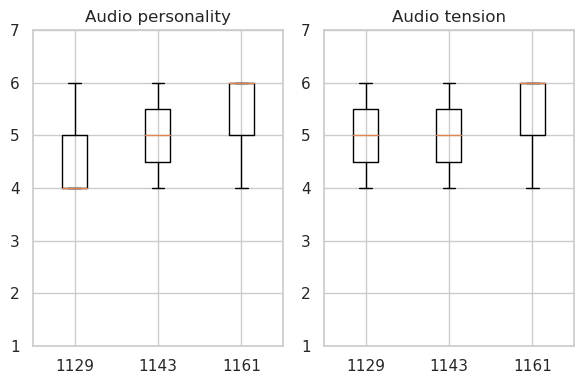

In [117]:
audio_personality_1129 = get_audio_data(data, "personality", sample_id=1129)
audio_personality_1143 = get_audio_data(data, "personality", sample_id=1143)
audio_personality_1161 = get_audio_data(data, "personality", sample_id=1161)

audio_tension_1129 = get_audio_data(data, "tension", sample_id=1129)
audio_tension_1143 = get_audio_data(data, "tension", sample_id=1143)
audio_tension_1161 = get_audio_data(data, "tension", sample_id=1161)

plt.figure(dpi=100)

ax = plt.subplot(1, 2, 1)
ax.set_title("Audio personality")
ax.boxplot([audio_personality_1129, audio_personality_1143, audio_personality_1161], labels=["1129", "1143", "1161"])
ax.set_ylim(1, 7)

ax = plt.subplot(1, 2, 2)
ax.set_title("Audio tension")
ax.boxplot([audio_tension_1129, audio_tension_1143, audio_tension_1161], labels=["1129", "1143", "1161"])
ax.set_ylim(1, 7)

plt.tight_layout()
plt.show()

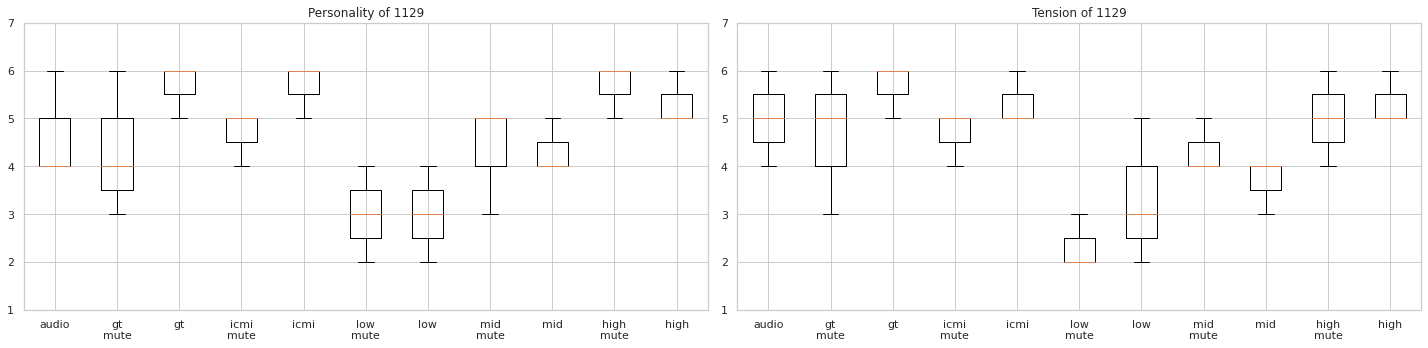

In [118]:
# 1129
sample_id = 1129

# personality
attr = "personality"

personality_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
personality_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
personality_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
personality_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# tension
attr = "tension"

tension_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
tension_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
tension_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
tension_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# naturalness
attr = "naturalness"

# video
name = "video"
nat_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
nat_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

plt.figure(figsize=(20, 5))

ax = plt.subplot(1, 2, 1)
ax.boxplot([
    personality_audio,
    personality_gt_mute,
    personality_gt,
    personality_icmi_mute,
    personality_icmi,
    personality_low_mute,
    personality_low,
    personality_mid_mute,
    personality_mid,
    personality_high_mute,
    personality_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Personality of {sample_id}")

ax = plt.subplot(1, 2, 2)
ax.boxplot([
    tension_audio,
    tension_gt_mute,
    tension_gt,
    tension_icmi_mute,
    tension_icmi,
    tension_low_mute,
    tension_low,
    tension_mid_mute,
    tension_mid,
    tension_high_mute,
    tension_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Tension of {sample_id}")

plt.tight_layout()

plt.show()

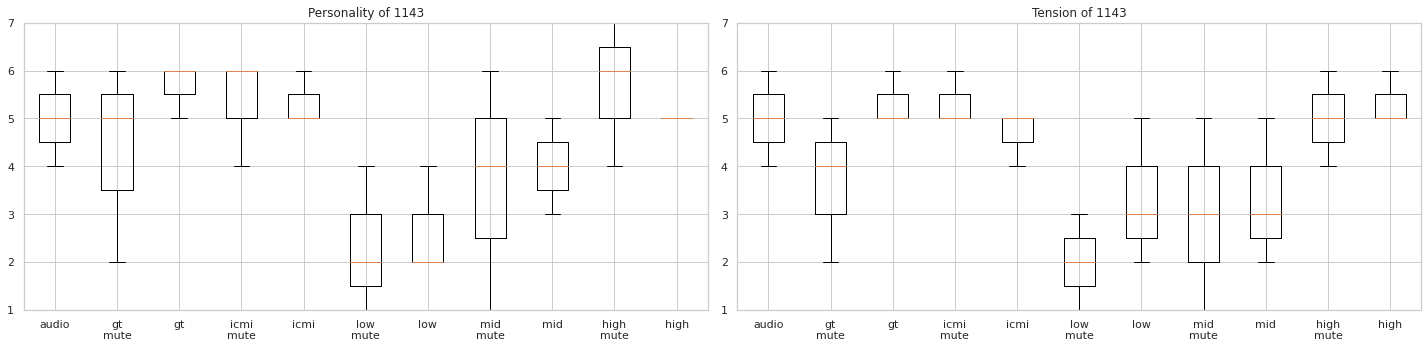

In [119]:
# 1143
sample_id = 1143

# personality
attr = "personality"

personality_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
personality_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
personality_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
personality_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# tension
attr = "tension"

tension_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
tension_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
tension_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
tension_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# naturalness
attr = "naturalness"

# video
name = "video"
nat_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
nat_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

plt.figure(figsize=(20, 5))

ax = plt.subplot(1, 2, 1)
ax.boxplot([
    personality_audio,
    personality_gt_mute,
    personality_gt,
    personality_icmi_mute,
    personality_icmi,
    personality_low_mute,
    personality_low,
    personality_mid_mute,
    personality_mid,
    personality_high_mute,
    personality_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Personality of {sample_id}")

ax = plt.subplot(1, 2, 2)
ax.boxplot([
    tension_audio,
    tension_gt_mute,
    tension_gt,
    tension_icmi_mute,
    tension_icmi,
    tension_low_mute,
    tension_low,
    tension_mid_mute,
    tension_mid,
    tension_high_mute,
    tension_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Tension of {sample_id}")

plt.tight_layout()

plt.show()

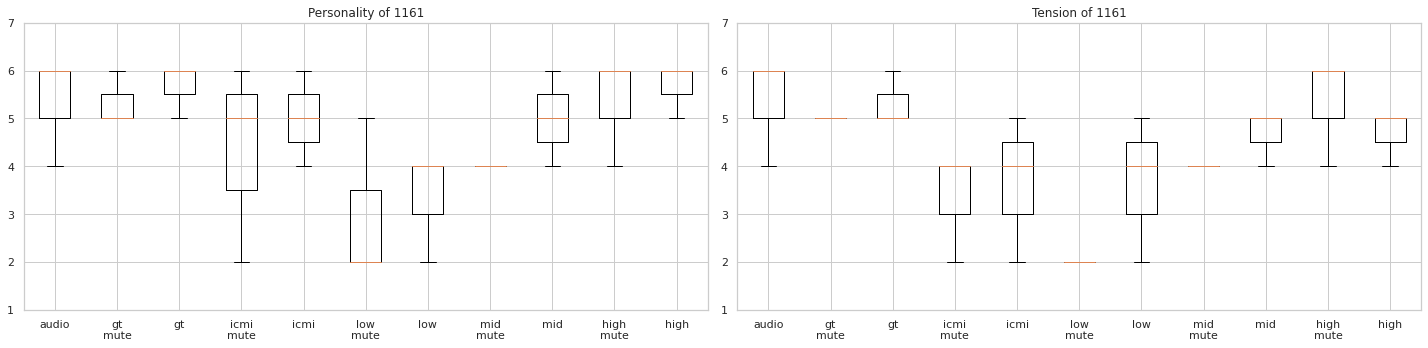

In [120]:
# 1161
sample_id = 1161

# personality
attr = "personality"

personality_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
personality_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
personality_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
personality_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
personality_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
personality_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
personality_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
personality_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# tension
attr = "tension"

tension_audio = get_audio_data(data, attr=attr, sample_id=sample_id)

# mute
name = "mute"
tension_gt_mute = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_mute = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_mute = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_mute = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_mute = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# video
name = "video"
tension_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
tension_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
tension_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
tension_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
tension_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
tension_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# naturalness
attr = "naturalness"

# video
name = "video"
nat_gt = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

# commu
name = "commu"
nat_gt_commu = get_data(data, name=name, model="gt", attr=attr, sample_id=sample_id)
nat_icmi_commu = get_data(data, name=name, model="icmi", attr=attr, sample_id=sample_id)
nat_low_commu = get_data(data, name=name, model="low", attr=attr, sample_id=sample_id)
nat_mid_commu = get_data(data, name=name, model="mid", attr=attr, sample_id=sample_id)
nat_high_commu = get_data(data, name=name, model="high", attr=attr, sample_id=sample_id)

plt.figure(figsize=(20, 5))

ax = plt.subplot(1, 2, 1)
ax.boxplot([
    personality_audio,
    personality_gt_mute,
    personality_gt,
    personality_icmi_mute,
    personality_icmi,
    personality_low_mute,
    personality_low,
    personality_mid_mute,
    personality_mid,
    personality_high_mute,
    personality_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Personality of {sample_id}")

ax = plt.subplot(1, 2, 2)
ax.boxplot([
    tension_audio,
    tension_gt_mute,
    tension_gt,
    tension_icmi_mute,
    tension_icmi,
    tension_low_mute,
    tension_low,
    tension_mid_mute,
    tension_mid,
    tension_high_mute,
    tension_high
], labels=[
    "audio",
    "gt\nmute",
    "gt",
    "icmi\nmute",
    "icmi",
    "low\nmute",
    "low",
    "mid\nmute",
    "mid",
    "high\nmute",
    "high"
])
ax.set_ylim(1, 7)
ax.set_title(f"Tension of {sample_id}")

plt.tight_layout()

plt.show()